# Traccia
## Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce " Download ourcomplete COVID-19 dataset"scaricare il dataset nel formato che si preferisce.
### 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati
### 2. Si chiede di trovare, per ogni continente:
    a. il numero di casi fin dall'inizio della pandemia
    b. la percentuale rispetto al totale mondiale del numero di casi
### 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
    a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
    b. il numero di nuovi casi rispetto alla data
       k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni
### 4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
    a. scrivere un breve commento a riguardo
### 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
    a. mostrare la somma dei pazienti ospedalizzati per ognuna
    b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [1]:
import os # Per il caricamento dinamico di file o l'eventuale uso di file di configurazione come .env
import pandas as pd  # Per la manipolazione dei dati
import numpy as np  # Per eventuali operazioni numeriche avanzate
import seaborn as sns  # Per visualizzazioni avanzate
import matplotlib.pyplot as plt # Per aggiungere alcune funzionalità utili alle visualizzazioni

In [2]:
# Ho caricato il dataset su GoogleDrive per una più veloce lettura del file da parte di un utente
df = pd.read_csv('https://drive.google.com/uc?id=1l2WXSp_LvRj0FbDrCSTZzAANjqkCy_0I')

## 0. Esplorazione del dataset

In [3]:
df.sample(10) # Per avere una visualizzazione del dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
84738,CIV,Africa,Cote d'Ivoire,2022-10-25,87693.0,0.0,17.000,827.0,0.0,0.000,...,NaN,19.351,NaN,57.78,0.538,28160548,NaN,NaN,NaN,NaN
395153,TUV,Oceania,Tuvalu,2020-03-17,0.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,67.57,NaN,11335,NaN,NaN,NaN,NaN
170342,HUN,Europe,Hungary,2020-05-25,3741.0,0.0,33.143,486.0,0.0,5.000,...,34.8,NaN,7.02,76.88,0.854,9967304,NaN,NaN,NaN,NaN
230120,MYS,Asia,Malaysia,2024-02-15,5273996.0,0.0,211.286,37347.0,0.0,0.000,...,42.4,NaN,1.90,76.16,0.810,33938216,NaN,NaN,NaN,NaN
400612,ARE,Asia,United Arab Emirates,2021-05-28,554516.0,0.0,1369.286,1648.0,0.0,2.714,...,37.4,NaN,1.20,77.97,0.890,9441138,NaN,NaN,NaN,NaN
312722,QAT,Asia,Qatar,2024-07-23,514524.0,0.0,0.000,690.0,0.0,0.000,...,26.9,NaN,1.20,80.23,0.848,2695131,NaN,NaN,NaN,NaN
361236,SSD,Africa,South Sudan,2020-11-24,3084.0,0.0,10.000,62.0,0.0,0.143,...,NaN,NaN,NaN,57.85,0.433,10913172,NaN,NaN,NaN,NaN
222463,OWID_LMC,NaN,Lower-middle-income countries,2023-09-02,91813411.0,0.0,329.286,1185468.0,0.0,3.000,...,NaN,NaN,NaN,NaN,NaN,3432097300,NaN,NaN,NaN,NaN
171697,HUN,Europe,Hungary,2024-02-09,2229804.0,0.0,38.000,49040.0,0.0,1.286,...,34.8,NaN,7.02,76.88,0.854,9967304,NaN,NaN,NaN,NaN
82211,CRI,North America,Costa Rica,2020-06-24,2058.0,0.0,63.714,12.0,0.0,0.000,...,17.4,83.841,1.13,80.28,0.810,5180836,NaN,NaN,NaN,NaN


In [4]:
print(df.columns) # Per una visualizzazione dei nomi delle colonne

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df.info() # Controllo i tipi di dati per colonna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
df.describe() # Per una visualizzazione iniziale delle statistiche descrittive per le colonne numeriche

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [7]:
# Verifica dei valori nulli:
for column in df.columns:
    nan_count = df[column].isna().sum() # Conteggio dei valori nulli per colonna
    nan_percentage = round(( nan_count / df.shape[0] )*100 , 2) # Calcolo l'impatto percentuale dei valori nulli
    print(f"{column} : {nan_count} valori nulli , {nan_percentage}% sul totale")

iso_code : 0 valori nulli , 0.0% sul totale
continent : 26525 valori nulli , 6.18% sul totale
location : 0 valori nulli , 0.0% sul totale
date : 0 valori nulli , 0.0% sul totale
total_cases : 17631 valori nulli , 4.11% sul totale
new_cases : 19276 valori nulli , 4.49% sul totale
new_cases_smoothed : 20506 valori nulli , 4.78% sul totale
total_deaths : 17631 valori nulli , 4.11% sul totale
new_deaths : 18827 valori nulli , 4.38% sul totale
new_deaths_smoothed : 20057 valori nulli , 4.67% sul totale
total_cases_per_million : 17631 valori nulli , 4.11% sul totale
new_cases_per_million : 19276 valori nulli , 4.49% sul totale
new_cases_smoothed_per_million : 20506 valori nulli , 4.78% sul totale
total_deaths_per_million : 17631 valori nulli , 4.11% sul totale
new_deaths_per_million : 18827 valori nulli , 4.38% sul totale
new_deaths_smoothed_per_million : 20057 valori nulli , 4.67% sul totale
reproduction_rate : 244618 valori nulli , 56.96% sul totale
icu_patients : 390319 valori nulli , 90.

In [8]:
"""
Annotazione:
Ci sono casi in cui il valore nella colonna continent è nullo, in questi casi la colonna location riflette aree specifiche come continenti o categorie
come 'low-income countries' ecc
"""

null_continents = df[df['continent'].isnull()]
print(null_continents['location'].unique())

['Africa' 'Asia' 'Europe' 'European Union (27)' 'High-income countries'
 'Low-income countries' 'Lower-middle-income countries' 'North America'
 'Oceania' 'South America' 'Upper-middle-income countries' 'World']


In [9]:
print(df['continent'].unique())
print(df['location'].nunique()) # Controllo i valori unici per le colonne di paesi e continenti

['Asia' nan 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
255


In [10]:
df.loc[df.duplicated()] # Controllo che non ci siano record duplicati

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [11]:
"""
Verifico se ci sono discrepanze tra la somma cumulativa della colonna new_patients ed il valore massimo della colonna total_patients per ogni paese.
Calcolo la percentuale di discrepanze sul totale e la percentuale di discrepanze che superano l'1%.
"""

# Le statistiche sono in fondo al primo output

# Cerco la percentuale con la quale i dati non combaciano e la percentuale delle discrepanze notevoli
discrepanze_count = 0  # Variabile per contare le discrepanze
total_countries = len(df['location'].unique()) # Numero totale di paesi
discrepanze_notevoli = 0 # Variabile per contare le discrepanze notevoli (oltre il 10%)

for country in df['location'].unique(): # Creo un ciclo per verficare se ci siano discrepanze
    
    casi_totali = df[df['location']==country]['total_cases'].max() # Cerco il valore massimo in icu_patients
    casi_nuovi = df[df['location']==country]['new_cases'].sum() # Sommo i valori di weekly_icu_admissions
    
    # Non considero i casi di record nulli e metto come condizione la diseguaglianza tra le colonne
    if pd.notna(casi_totali) and pd.notna(casi_nuovi) and casi_totali != casi_nuovi: 
        
        discrepanze_count += 1 # Sommo 1 per ogni discrepanza
        percentuale_discrepanze = (discrepanze_count / total_countries)*100 

        differenza = abs(casi_totali - casi_nuovi) # Differenza in valore assoluto
        
        valore_maggiore = max(casi_totali , casi_nuovi) # Prendo il valore maggiore tra icu_totali e icu_nuovi per calcolare la percentuale di variazione
        percentuale = (differenza / valore_maggiore)*100
        if percentuale > 1:
            discrepanze_notevoli += 1
            percentuale_discrepanze_notevoli = (discrepanze_notevoli / total_countries)*100
        
        print(country, ": c'è una discrepanza tra i conteggi di", differenza)

print('\n',f"I dati non combaciano nel {percentuale_discrepanze:.2f}% dei casi"
      '\n',f"Nel {percentuale_discrepanze_notevoli:.2f}% dei casi c'è una discrepanza che supera l'1%")

Africa : c'è una discrepanza tra i conteggi di 1451.0
Asia : c'è una discrepanza tra i conteggi di 65081.0
Belize : c'è una discrepanza tra i conteggi di 2.0
Burundi : c'è una discrepanza tra i conteggi di 105.0
Ecuador : c'è una discrepanza tra i conteggi di 1594.0
Equatorial Guinea : c'è una discrepanza tra i conteggi di 98.0
Fiji : c'è una discrepanza tra i conteggi di 7.0
Guatemala : c'è una discrepanza tra i conteggi di 27.0
High-income countries : c'è una discrepanza tra i conteggi di 3.0
Low-income countries : c'è una discrepanza tra i conteggi di 353.0
Lower-middle-income countries : c'è una discrepanza tra i conteggi di 65311.0
Malawi : c'è una discrepanza tra i conteggi di 88.0
Maldives : c'è una discrepanza tra i conteggi di 1.0
Mauritania : c'è una discrepanza tra i conteggi di 124.0
Mayotte : c'è una discrepanza tra i conteggi di 875.0
Micronesia (country) : c'è una discrepanza tra i conteggi di 87.0
North America : c'è una discrepanza tra i conteggi di 32.0
Oceania : c'è 

Vediamo come i dati corrispondano nell'89.02% casi, risultando discrepanti o per i raggruppamenti come 'low-income countries' oppure per alcuni paesi.<br>
Notiamo che la discrepanza rimane ininfluente essendo di valore basso, infatti soltanto nel 0.39% dei casi la discrepanza supera l'1%.<br>
Per i paesi che andremo ad analizzare i dati corrispondono.

# 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [12]:
print(f"Il totale dei record è di {df.shape[0]}, i quali si estendono per {df.shape[1]} colonne.")

Il totale dei record è di 429435, i quali si estendono per 67 colonne.


In [13]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

# 2. Si chiede di trovare, per ogni continente:
## a. il numero di casi fin dall'inizio della pandemia
## b. la percentuale rispetto al totale mondiale del numero di casi

In [14]:
continents = df.groupby('continent') # Raggruppo i dati per continente

# Sommo i casi per continente e li arrotondo in modo da avere un numero intero per una preferenza nella visualizzazione del dato:
continent_cases = continents['new_cases'].sum().round(0).astype(int) 

total_cases = sum(continent_cases)
print('i casi mondiali totali sono', f"{total_cases:,}")  # Visualizzazione dei casi mondiali totali con ',' come separatore per una visualizzazione più immediata

i casi mondiali totali sono 775,935,057


## a. il numero di casi fin dall'inizio della pandemia

In [15]:
# Visualizzazione testuale 

print(continent_cases)

continent
Africa            13146831
Asia             301564180
Europe           252916868
North America    124492698
Oceania           15003468
South America     68811012
Name: new_cases, dtype: int32


C:\Users\vladb\AppData\Local\Temp\ipykernel_39276\2728683412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  continent_cases_barplot = sns.barplot( data = df , # Provenienza dei dati


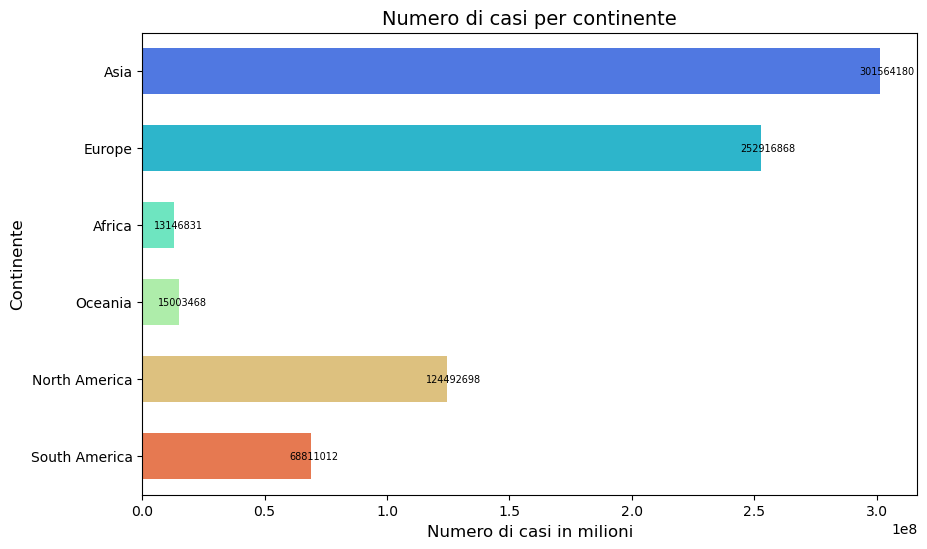

In [16]:
# Visualizzazione grafica

plt.figure(figsize=(10, 6)) # Imposto le dimensioni

# Creo il grafico
continent_cases_barplot = sns.barplot( data = df , # Provenienza dei dati
                                      x = 'new_cases', # Valori degli assi x e y
                                      y = 'continent' , 
                                      palette = 'rainbow' , # Palette di colori
                                      estimator = 'sum' , # Per fare in modo che i valori di new_cases siano sommati
                                      width = 0.6 , # Larghezza delle bars
                                      errorbar = None) # Rimozione della barra di errore

# Creo un ciclo per ottenere i valori delle diverse bars in output
for container in continent_cases_barplot.containers:
    continent_cases_barplot.bar_label(container , fmt = '%.0f', label_type = 'edge', padding = -15 , fontsize = 7)
    
# Definisco il titolo del grafico e le etichette degli assi
continent_cases_barplot.set_title('Numero di casi per continente' , fontsize = 14)
continent_cases_barplot.set_xlabel('Numero di casi in milioni' , fontsize = 12)
continent_cases_barplot.set_ylabel('Continente' , fontsize = 12)

plt.show()

## b. la percentuale rispetto al totale mondiale del numero di casi

In [17]:
# Visualizzazione testuale

for continent, cases in continent_cases.items():     # Itero i casi per continente e ne ricavo i casi totali e la percentuale sul totale mondiale
    percentage = round((cases / total_cases) * 100, 2)     # Calcolo necessario per la percentuale
    print(f"I casi totali in {continent} sono {cases:,}; mentre la percentuale rispetto ai casi mondiali è {percentage} %")

I casi totali in Africa sono 13,146,831; mentre la percentuale rispetto ai casi mondiali è 1.69 %
I casi totali in Asia sono 301,564,180; mentre la percentuale rispetto ai casi mondiali è 38.86 %
I casi totali in Europe sono 252,916,868; mentre la percentuale rispetto ai casi mondiali è 32.6 %
I casi totali in North America sono 124,492,698; mentre la percentuale rispetto ai casi mondiali è 16.04 %
I casi totali in Oceania sono 15,003,468; mentre la percentuale rispetto ai casi mondiali è 1.93 %
I casi totali in South America sono 68,811,012; mentre la percentuale rispetto ai casi mondiali è 8.87 %


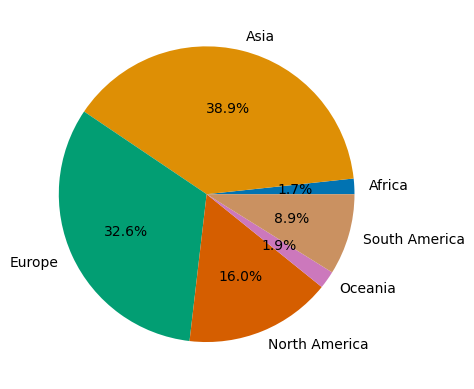

In [18]:
# Visualizzazione grafica

continent_cases_pie = plt.pie(continent_cases,
                              labels=continent_cases.index, # Utilizzo i nomi dei continenti come etichette
                              autopct='%1.1f%%', # Visualizzazione delle percentuali
                              colors=sns.color_palette('colorblind', len(continent_cases))) # Palette di colori

plt.show()

## Soluzione Interattiva Alternativa con Visualizzazione Testuale:

In [20]:
while True: # Condizione necessaria ad un loop continuo 
    
    # Si chiede all'utente di inserire un continente o di terminare il processo
    selected_continent = input('Inserisci il nome del continente desiderato oppure "esci" per terminare: ').title()

    # Verifico se l'utente vuole uscire
    if selected_continent.lower() == 'esci':   
        print('Richiesta completata')
        break

    # Verifico che il continente esista nel dataset
    elif selected_continent in continent_cases.index: 
        percentages = round((continent_cases[selected_continent] / total_cases) * 100, 2) # Calcolo percentuale
        print(f"I casi totali in {selected_continent} sono {continent_cases[selected_continent]:,}," 
              f"che rappresentano il {percentages}% dei casi mondiali.") # Output
        
    else:
        # Messaggio nel caso in cui l'input dell'utente non sia presente tra i continenti
        print('Contenente non valido. Scegliere tra: Africa, Asia, Europe, North America, Oceania o South America') 
        
# Ricordarsi di inserire 'esci' per proseguire con il resto dell'analisi

Inserisci il nome del continente desiderato oppure "esci" per terminare:  asia


I casi totali in Asia sono 301,564,180,che rappresentano il 38.86% dei casi mondiali.


Inserisci il nome del continente desiderato oppure "esci" per terminare:  europa


Contenente non valido. Scegliere tra: Africa, Asia, Europe, North America, Oceania o South America


Inserisci il nome del continente desiderato oppure "esci" per terminare:  Europa


Contenente non valido. Scegliere tra: Africa, Asia, Europe, North America, Oceania o South America


Inserisci il nome del continente desiderato oppure "esci" per terminare:  europe


I casi totali in Europe sono 252,916,868,che rappresentano il 32.6% dei casi mondiali.


Inserisci il nome del continente desiderato oppure "esci" per terminare:  esci


Richiesta completata


# 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
## a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
## b. il numero di nuovi casi rispetto alla data
##   k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [21]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d') # Mi assicuro di convertire i valori della colonna 'date' in datetime

# Filtri
italy = df[df['location'] == 'Italy'] #Filtro i dati per l'Italia
italy_2022 = italy[italy['date'].dt.year == 2022] #Filtro per l'anno 2022

# Rimuovo le righe dove non ci sono dati nelle colonne new_cases e total_cases
italy_2022 = italy_2022.dropna(subset=['new_cases', 'total_cases']) 

# Converto i dati delle due colonne in interi (per preferenza nella visualizzazione del dato)
italy_2022['new_cases'] = italy_2022['new_cases'].astype(int)  
italy_2022['total_cases'] = italy_2022['total_cases'].astype(int)

# Filtro i dati non misurati (punto k)
italy_2022 = italy_2022[(italy_2022['new_cases'] > 0) & (italy_2022['total_cases'] > 0)]  

In [22]:
# Output visualizzazione testuale dei dati

print('I casi totali in Italia nel 2022 sono stati',f"{italy_2022['new_cases'].sum():,}", # Visualizzazione relativa ai dati sui casi totali in Italia nel 2022
      '\n','Con',f"{italy_2022['total_cases'].min():,}",'ad inizio anno e',f"{italy_2022['total_cases'].max():,}",'a fine anno') # Trovo i valori iniziali e finali

# Aggiungo il valore minimo e quello massimo con le relative date
print(f"I nuovi casi in Italia nel 2022 hanno avuto un picco di {italy_2022['new_cases'].max():,}" +
      f" nella settimana del {italy_2022[italy_2022['new_cases']==italy_2022['new_cases'].max()]['date'].dt.date.iloc[0]},"
      ,'\n',
      f"ed un minimo di {italy_2022['new_cases'].min():,} nella settimana del {italy_2022[italy_2022['new_cases']==italy_2022['new_cases'].min()]['date'].dt.date.iloc[0]}")

I casi totali in Italia nel 2022 sono stati 19,438,072 
 Con 6,267,035 ad inizio anno e 25,060,503 a fine anno
I nuovi casi in Italia nel 2022 hanno avuto un picco di 1,268,153 nella settimana del 2022-01-16, 
 ed un minimo di 110,644 nella settimana del 2022-09-11


## a. l'evoluzione del casi totali dall'inizio alla fine dell'anno

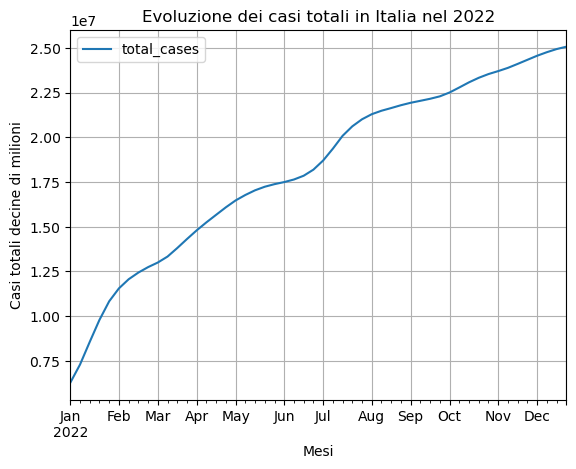

In [23]:
# Creo il grafico
tot_ita_22_plot = italy_2022.plot(kind = 'line', # Tipo di grafico
                                  x = 'date', # Valori degli assi x e y
                                  y = 'total_cases',
                                  title = 'Evoluzione dei casi totali in Italia nel 2022') # Titolo del grafico

# Definisco le etichette degli assi
tot_ita_22_plot.set_xlabel('Mesi') 
tot_ita_22_plot.set_ylabel('Casi totali decine di milioni')

plt.grid(True) # Aggiungo una griglia allo sfondo del grafico
plt.show()

## b. il numero di nuovi casi rispetto alla data

In [24]:
# Converto la colonna 'date' in data in modo che sul grafico non mi sia fornito in output un datestamp
italy_2022['date'] = pd.to_datetime(italy_2022['date'], format='%Y-%m-%d').dt.date 

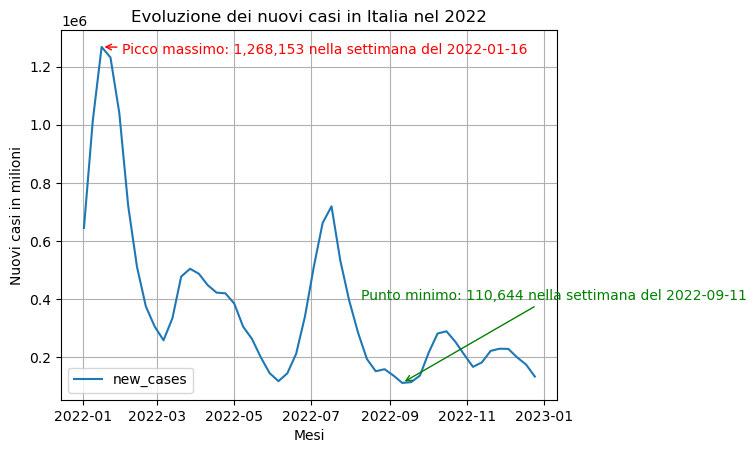

In [25]:
# Creo il grafico
new_ita_22_plot = italy_2022.plot(kind = 'line', x = 'date', y = 'new_cases', title = 'Evoluzione dei nuovi casi in Italia nel 2022') 

# Definisco le etichette degli assi
new_ita_22_plot.set_xlabel('Mesi') 
new_ita_22_plot.set_ylabel('Nuovi casi in milioni')

# Creo delle annotazioni sul picco massimo e minimo 
picco = italy_2022.loc[italy_2022['new_cases'].idxmax()] # Utilizzo idx perché mi ritorna l'indice della riga in cui si verifica la condizione
minimo = italy_2022.loc[italy_2022['new_cases'].idxmin()] # In questo modo posso ricavare anche la data sul grafico

plt.annotate(f"Picco massimo: {picco['new_cases']:,} nella settimana del {picco['date']}",  # Testo dell'annotazione
             (picco['date'], picco['new_cases']),  # Posizione del punto (data, valore)
             xytext = ( 15 , -5),  # Vari settings sulle caratteristiche di testo e freccia
             textcoords = 'offset points', 
             arrowprops = dict(arrowstyle='->', color='red'),  
             fontsize = 10, color = 'red')

plt.annotate(f"Punto minimo: {minimo['new_cases']:,} nella settimana del {minimo['date']}",
             (minimo['date'], minimo['new_cases']),
             xytext = ( -30 , 60 ),
             textcoords = 'offset points',
             arrowprops = dict( arrowstyle = '->', color = 'green'),
             fontsize = 10 , color = 'green' )

plt.grid(True)
plt.show()

# 4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
##  a. scrivere un breve commento a riguardo

In [26]:
"""
Prendendo nota del file README del dataset fornitomi:

  icu_patients = Number of COVID-19 patients in intensive care units (ICUs) on a given day
  weekly_icu_admissions = Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week (reporting date and the preceeding 6 days)
  
Essendo che non viene richiesto il numero totale di pazienti in terapia intensiva ma l'evoluzione del numero nel periodo dato, 
ho deciso di utilizzare i dati della colonna icu_patients.
"""

# Filtro i dati per i paesi ed il periodo richiesti
ita_ger_fra = ['Italy' , 'Germany' , 'France'] 
dati_filtrati = df[(df['location'].isin(ita_ger_fra)) &  (df['date'] >= '2022-05-01') &  (df['date'] <= '2023-04-30')]

# Rimuovo i valori nulli
dati_filtrati = dati_filtrati.dropna(subset = ['icu_patients']) 

# Converto in numero intero
dati_filtrati['icu_patients'] = dati_filtrati['icu_patients'].astype(int) 

C:\Users\vladb\AppData\Local\Temp\ipykernel_39276\3106707170.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot( data = dati_filtrati, # Origine dei dati


Text(0, 0.5, 'Numero di pazienti in terapia intensiva')

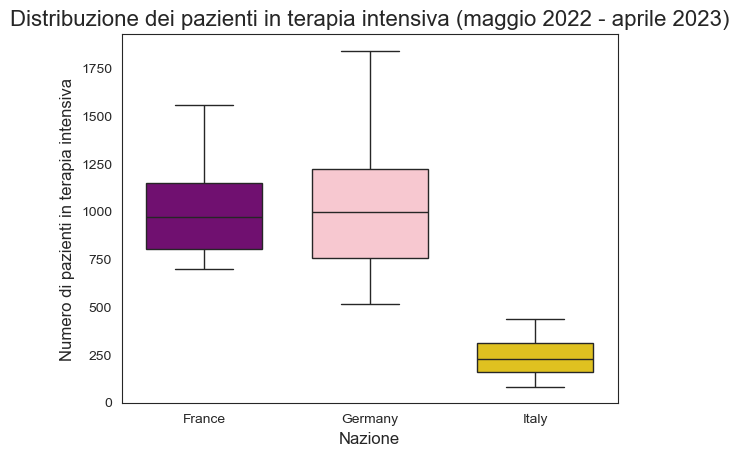

In [27]:
# Setto lo stile del grafico
sns.set_style('white')   

# Creo il grafico con i vari setting
boxplot = sns.boxplot( data = dati_filtrati, # Origine dei dati
                      x = 'location',
                      y = 'icu_patients',
                      palette = ['purple','pink','gold'], # Palette di colori
                      width = 0.7 ) # Larghezza dei box

# Definisco il titolo del grafico e le etichette degli assi
boxplot.set_title('Distribuzione dei pazienti in terapia intensiva (maggio 2022 - aprile 2023)', fontsize = 16)
boxplot.set_xlabel('Nazione', fontsize = 12)
boxplot.set_ylabel('Numero di pazienti in terapia intensiva', fontsize = 12)

##  a. scrivere un breve commento a riguardo

-  Premessa:<br>
Il grafico boxplot mostra la distribuzione dei pazienti in cura intensiva (ICU) di Francia, Italia e Germania tra maggio 2022 e aprile 2023.<br>
La linea centrale nei box rappresenta la mediana, mentre il box delinea il 25° ed il 75° percentile.<br>
Le linee esterne rappresentano gli estremi della distribuzione.

-  Lettura:<br>
A primo impatto l'Italia si distingue dalle altre nazioni per il numero di pazienti in ICU molto più basso e per la distribuzione molto più stretta.<br>
Francia e Germania presentano una mediana pressapoco identica, ma la Germania ha valori leggermente più elevati ed una distribuzione più ampia.

-  Conclusione:<br>
La Germania presenta numeri più alti e variazioni più significative nel tempo, indicando potenzialmente una gestione flessibile ma con grandi picchi di domanda.<br>
La Francia, con una distribuzione più stretta e numeri leggermente inferiori, mostra una maggiore stabilità. <br>
L'Italia, infine, si distingue per il minor numero di pazienti e un andamento molto più regolare, forse dovuto a una minore pressione sul sistema sanitario o a strategie differenti nella gestione della pandemia.

# 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
## a. mostrare la somma dei pazienti ospedalizzati per ognuna
## b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [28]:
# Filtro i dati per i paesi e l'anno richiesti
ita_ger_fra_spa = ita_ger_fra + ['Spain'] 
dati_filtrati_2023 = df[(df['location'].isin(ita_ger_fra_spa)) &  (df['date'].dt.year == 2023)] 

In [29]:
"""
Prendendo nota del file README del dataset fornitomi:

  icu_patients = Number of COVID-19 patients in intensive care units (ICUs) on a given day
  weekly_icu_admissions	= Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week (reporting date and the preceeding 6 days)

In questo caso reputo i dati della colonna weekly_hosp_admissions più adatti all'analisi richiesta. 
I dati della colonna hosp_patients potrebbero dare risultati errati sulla somma dei pazienti essendo che uno stesso paziente potrebbe essere contato più volte.

Un altro motivo della mia scelta è che la colonna hosp_patients per la Germania presenta soltanto valori nulli, rendendo l'analisi compromessa.
"""  

# Funzione per confrontare il numero di valori nulli presenti in 'hosp_patients' e 'weekly_hosp_admissions'
def count_nulls_by_country(df, country):
    country_data = df[df['location'] == country] 
    null_count = country_data['hosp_patients'].isna().sum()
    weekly_null_count = country_data['weekly_hosp_admissions'].isna().sum()
    total_records = country_data.shape[0]
    print(f"{country}: Valori nulli: {null_count} in hosp_patients e {weekly_null_count} in weekly_hosp_admissions, su {total_records} record")

# Iterazione sui paesi con la funzione
for country in ita_ger_fra_spa:
    count_nulls_by_country(dati_filtrati_2023, country)

Italy: Valori nulli: 0 in hosp_patients e 0 in weekly_hosp_admissions, su 365 record
Germany: Valori nulli: 365 in hosp_patients e 187 in weekly_hosp_admissions, su 365 record
France: Valori nulli: 275 in hosp_patients e 275 in weekly_hosp_admissions, su 365 record
Spain: Valori nulli: 203 in hosp_patients e 203 in weekly_hosp_admissions, su 365 record


## a. mostrare la somma dei pazienti ospedalizzati per ognuna

In [30]:
# Funzione per calcolare la somma dei pazienti ospedalizzati
def calculate_hosp(df,country,year):
    country_data = df[(df['location'] == country) & (df['date'].dt.year == year)] # FIltro per paese
    return country_data['weekly_hosp_admissions'].sum() # Somma

totals_hosp = {country: calculate_hosp(df, country, 2023) for country in ita_ger_fra_spa} # Uso un dizionario per i risultati

print('I numeri dei pazienti ospitalizzati nei vari paesi sono:')
for country, total in totals_hosp.items():
    print(f"{country}: {int(total):,}")

I numeri dei pazienti ospitalizzati nei vari paesi sono:
Italy: 592,019
Germany: 897,776
France: 268,117
Spain: 299,463


C:\Users\vladb\AppData\Local\Temp\ipykernel_39276\1341683879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  hosp_2023_barplot = sns.barplot( data = dati_filtrati_2023, x = 'location', y = 'weekly_hosp_admissions', palette = 'pastel',  estimator = 'sum' , width = 0.6 , errorbar = None )


Text(0, 0.5, 'Pazienti ospedalizzati in centinaia di migliaia')

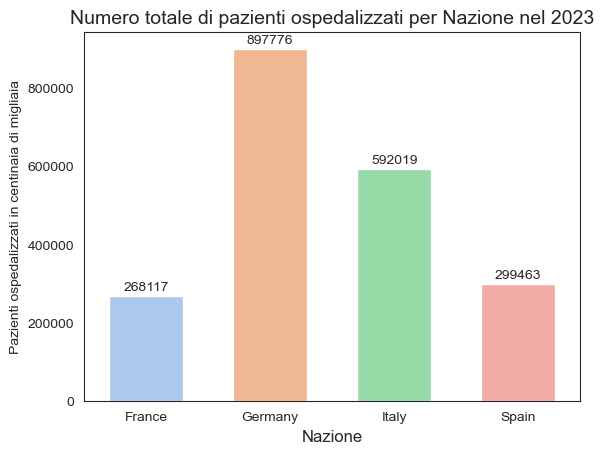

In [31]:
# Visualizzazione grafica

sns.set_style('white')   # Setto la base del grafico

# Creo il grafico con i vari setting
hosp_2023_barplot = sns.barplot( data = dati_filtrati_2023, x = 'location', y = 'weekly_hosp_admissions', palette = 'pastel',  estimator = 'sum' , width = 0.6 , errorbar = None )

# Aggiungo le etichette sopra le barre
for container in hosp_2023_barplot.containers:
    hosp_2023_barplot.bar_label(container , fmt = '%.0f', label_type = 'edge', padding = 2)

# Definisco il titolo del grafico e le etichette degli assi
hosp_2023_barplot.set_title('Numero totale di pazienti ospedalizzati per Nazione nel 2023' , fontsize = 14)
hosp_2023_barplot.set_xlabel('Nazione' , fontsize = 12)
hosp_2023_barplot.set_ylabel('Pazienti ospedalizzati in centinaia di migliaia' , fontsize = 10)

## b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In questo caso, avendo utilizzato la colonna weekly_hosp_admissions, ho deciso di non gestire i dati nulli con una sostituzione (come interpolazione o media) poiché non sarebbe coerente con il dato settimanale. <br>

Nel caso avessi deciso di usare la colonna hosp_patients avrebbe forse avuto più senso affidarmi ad una sostituzione per ottenere una continuità temporale del dato. <br>
Esempio: in settimana_1 ci sono 10 pazienti, in settimana_2 ce ne sono 20 e nei giorni tra i due campionamenti i dati sono nulli.<br>
In questo caso si potrebbe utilizzare una sostituzione per gestire i dati nulli, in modo da ottenere valori intermedi tra 10 e 20.